# <font color=red>Tutorial 10 - Classification - kNN</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings
warnings.filterwarnings("ignore")
custom_palette = sns.color_palette('viridis', 3)
sns.set_palette(custom_palette)

## The Scikit-learn Library

Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering algorithms. In this tutorial, we focus on the k Nearest Neighbors (kNN) classification algorithm.

## The k Nearest Neighbors (kNN) Algorithm

The kNN algorithm is a non-parametric supervised learning method. We are given a labeled dataset consisting of training observations (x,y) and would like to capture the relationship between x and y, then use this 'knowledge' to classify a new observetion x'.

<img src='kNN-concept.png' width="500" height="500">

In this tutorial we will work with the Iris dataset available in the scikit-learn library. we will train a kNN model to predict the type of iris, and then evaluate it. We will acheive this using the following steps:

1. Load the Iris dataset from the Scikit-learn library
2. Randomly split the labeled data to train and test sets.
3. Train the model on the train set.
4. Based on the trained model – predict the label of the test set. 
5. Evaluate our model by Comparing the prediction results with the original labeled data

<img src='splitting-data.png' width="500" height="300">

### 1. Load the Iris dataset from the Scikit-learn library into Pandas Dataframe

The result of the following `load_iris()` method is a map-like object with four components:
* target - 1D numpy array of target attribute value (the labels)
* data - 2D numpy array containing the data
* feature_names - 1D numpy array containing the feautures' names
* DESCR - text description of the dataset<br>
So it is easy to convert it to a pandas DataFrame:

In [2]:
from sklearn import datasets
iris_data = datasets.load_iris()
# print(iris_data['DESCR'])

In [3]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['class'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<img src='iris_sepal_petal.jpg' width="500" height="500">

### Visualize the data

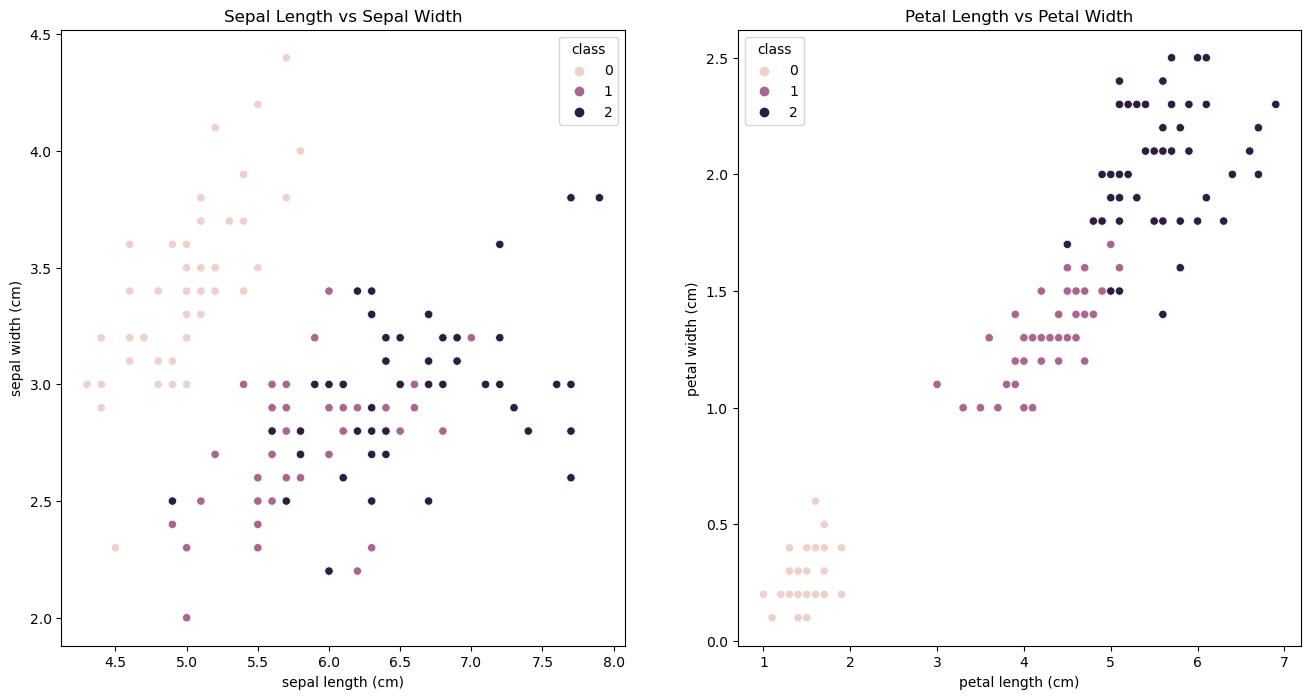

In [4]:
fig, axs = plt.subplots(1, 2)
colors = ['red', 'orange', 'blue'] # create color map, color for each iris type
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='class', ax=axs[0])
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='class', ax=axs[1])
axs[0].set_title('Sepal Length vs Sepal Width')
axs[1].set_title('Petal Length vs Petal Width')
fig.set_size_inches(16, 8)

### 2. Train Test Split

The next step is to split our dataset into its features and labels. The X variable contains the first four columns of the dataset (i.e. features) while y contains the labels.

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = iris_df.iloc[:, :-1].values # features
Y = iris_df.iloc[:, -1].values # labels

We will divide our dataset into train set and test set. 

The model will learn using the train set and will be evaluated by predicting the test set.

we will use the `train_test_split()` method to split the data into train and test:

In [7]:
from sklearn.model_selection import train_test_split
# train_test_split?

The following code splits the dataset into 80% train data and 20% test data. 

This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records:

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)  
print('X train set size: ' + str(X_train.shape))
print('X_test set size: ' + str(X_test.shape))
print('Y_train set size: ' + str(Y_train.shape))
print('Y_test set size: ' + str(Y_test.shape))

X train set size: (120, 4)
X_test set size: (30, 4)
Y_train set size: (120,)
Y_test set size: (30,)


- The train set contains 120 observations:
    - The are 4 featues in the 'X_train' parameter.
    - The label are in the 'Y_train' parameter. There is one column of label.
- The test set contains 30 observations with 1 label.
    - The are 4 featues in the 'X_test' parameter.
    - The label are in the 'Y_test' parameter. There is one column of label.

### 3. Train a kNN Model

* The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
* In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. 
* There is no ideal value forkand it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for kNN algorithm.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5) # K=5

To train our model, we will use the fit() method:

In [10]:
kNN.fit(X_train, Y_train)

KNeighborsClassifier()

### 4. Predict Using Our Trained kNN Model

The final step is to make predictions on our test data (X_test):

In [11]:
Y_pred = kNN.predict(X_test)

For each observation in the test set the classifier predict a label. (0 or 1 or 2) 

So, in total there are 30 predicted values:

In [12]:
Y_pred

array([1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 2, 2])

In [13]:
Y_test

array([1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 2, 2])

### 5. Evaluate Our kNN Model

We will evaluate our model by calculating its accuracy: dividing the number of correct predictions by the total number of samples.

In [14]:
total_observations = len(Y_test)
total_matches = 0
for pred_value, real_value in zip(Y_pred, Y_test):
    if pred_value == real_value:
        total_matches += 1
        
print (f"The accuracy of the classifier is: {total_matches/total_observations}")

The accuracy of the classifier is: 0.9666666666666667


The built-in `score(X,Y)` method returns the **accuracy** of a classifier. It runs predict(X) and then returns the accuracy by comparing the result to the given Y.

In [15]:
kNN.score(X_test, Y_test)

0.9666666666666667

## <font color=blue>**Exercise\FAQ**</font>

1. What will happen when the kNN algorithm has to choose between two neighbors which have identical distances from the test point but different labels? <br>

**Notice**: Sklearn expects to receive the features as a 2D array.

In [16]:
# We start defining 2 points in a 1D space: x1=10, x2=12
X = np.array([10,12]).reshape(-1,1)  # reshape is needed to create a 2D array. 
# When providing -1 to the reshape function, the value is inferred from the length of the array and remaining dimensions.

# We assign different classes to the points
Y = np.array([0,1])

In [17]:
# we fit a 1-NN classifier
kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X, Y)

# We try to predict a target with a value of 11 
X_test=np.array([11]).reshape(-1,1)
pred = kNN.predict(X_test)
print(pred)

[0]


The results will depend on the ordering of the training data.

2. What will happen when the kNN algorithm faces a tie (i.e., there is no majority)? <br>

In [18]:
# We start defining 3 points in a 1D space: x1=10, x2=11, x3=12
X = np.array([10,11,12]).reshape(-1,1)  

# We assign different classes to the points
Y = np.array([1,0,2])

# we fit a 2-NN classifier
kNN = KNeighborsClassifier(n_neighbors=2)
kNN.fit(X, Y)

# We try to predict samples with 5 and 15 values (it will be a tie in both cases) 
X_test=np.array([5,15]).reshape(-1,1)
pred = kNN.predict(X_test)
print(pred)

[0 0]


The results will depend on the lowest class' value.

3. In the following example we have an 'easy' classification task. We got the following dataset in which each animal who has wings is also a bird, but it contains only 2 animals who have wings.
- Train a kNN model on the given data with K=5
- Test your trained model on the given 'test_sample' - it contains one animal without wings ('0'), and one with wings ('1').

Is the classifier working properly? if not, explain why and suggest adjusments to make it work properly

In [19]:
arr = [0] * 100
arr[0:2] = [1, 1]

df = pd.DataFrame({'has_wings': arr, 'is_bird': arr})
df.head()

,has_wings,is_bird
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


In [20]:
X = df.loc[:, 'has_wings'].values.reshape(-1,1) # features 
Y = df.loc[:, 'is_bird'].values # label
test_sample = np.array([0, 1]).reshape(-1, 1)

In [21]:
test_sample

array([[0],
       [1]])

In [22]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X, Y)
kNN.predict(test_sample)

array([0, 0], dtype=int64)

Since we chose `n_neighbors=5`, zero is always the majority class (as there are only 2 ones). Therfore, it is important to choose appropriate k according to the situation.